# Statistical Mechanics-Spring 2020: Problem Set 2
### Gabriel Jurado

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from scipy.integrate import simps
from math import sqrt
from scipy.stats import norm

Consider the same problem discussed in HW1, i.e., that of $N$ classical particles in a box of volume $V=L_x\times L_y\times L_z$ interacting pairwise by means of a Lennard-Jones potential. We allowed these particles to evolve in time starting from an initial configuration $(\{\vec{p_i}(0),\vec{r_i}(0))$ according to classical Hamilton's equations of motion. During this evolution we "measured" the instantaneous configuration $(\{\vec{p_i}(t),\vec{r_i}(t))$ for a system of $N$ particles. From each configuration, at instants $t_n=n\Delta t$ and for only the subsystem defined by those particles which are in one-half of the box, i.e., those with $x_i(t)<L/2$, we calculated the instantaneous total energy $E_1(t_n)$, and the instantaneous number of particles $N_1(t_n)$ of this subsystem 1. 

The calculations are done for:

1. $N=32$ using a $4\times4\times2a^3$ size box
2. $N=64$ using a $4\times4\times4a^3$ size box
3. $N=128$ using a $4\times8\times4a^3$ size box and an $8\times4\times4a^3$ box
4. $N=256$ using an $8\times8\times4a^3$ size box and a $4\times8\times8a^3$ box

** 1). Plot the results for $E_1(t_n)$, $E_2(t_n)$, $E_{12}(t_n)$ and their energy $E_T=E_1+E_2+E_{12}$ as a function of time for each value of $N$ separately. Notice that the total energy of the entire system remains constant during evolution. The relatively small-time dependence of $E_T$ is due to the accumulated finite time-step error. On a separate graph, plot the number of particles $N_1(t_n)$ as a function of time.**

In [2]:
#import the data files 

#N=32
E1_4x4x2 = np.loadtxt('/home/gabriel/HW2/E1_4x4x2.dat')
E2_4x4x2 = np.loadtxt('/home/gabriel/HW2/E2_4x4x2.dat')
E12_4x4x2 = np.loadtxt('/home/gabriel/HW2/E12_4x4x2.dat')
N1_4x4x2 = np.loadtxt('/home/gabriel/HW2/N1_4x4x2.dat')

#N=64
E1_4x4x4 = np.loadtxt('/home/gabriel/HW2/E1_4x4x4.dat')
E2_4x4x4 = np.loadtxt('/home/gabriel/HW2/E2_4x4x4.dat')
E12_4x4x4 = np.loadtxt('/home/gabriel/HW2/E12_4x4x4.dat')
N1_4x4x4 = np.loadtxt('/home/gabriel/HW2/N1_4x4x4.dat')

#N=128
E1_4x8x4 = np.loadtxt('/home/gabriel/HW2/E1_4x8x4.dat')
E2_4x8x4 = np.loadtxt('/home/gabriel/HW2/E2_4x8x4.dat')
E12_4x8x4 = np.loadtxt('/home/gabriel/HW2/E12_4x8x4.dat')
N1_4x8x4 = np.loadtxt('/home/gabriel/HW2/N1_4x8x4.dat')

E1_8x4x4 = np.loadtxt('/home/gabriel/HW2/E1_8x4x4.dat')
E2_8x4x4 = np.loadtxt('/home/gabriel/HW2/E2_8x4x4.dat')
E12_8x4x4 = np.loadtxt('/home/gabriel/HW2/E12_8x4x4.dat')
N1_8x4x4 = np.loadtxt('/home/gabriel/HW2/N1_8x4x4.dat')

#N=256
E1_8x8x4 = np.loadtxt('/home/gabriel/HW2/E1_8x8x4.dat')
E2_8x8x4 = np.loadtxt('/home/gabriel/HW2/E2_8x8x4.dat')
E12_8x8x4 = np.loadtxt('/home/gabriel/HW2/E12_8x8x4.dat')
N1_8x8x4 = np.loadtxt('/home/gabriel/HW2/N1_8x8x4.dat')

E1_4x8x8 = np.loadtxt('/home/gabriel/HW2/E1_4x8x8.dat')
E2_4x8x8 = np.loadtxt('/home/gabriel/HW2/E2_4x8x8.dat')
E12_4x8x8 = np.loadtxt('/home/gabriel/HW2/E12_4x8x8.dat')
N1_4x8x8 = np.loadtxt('/home/gabriel/HW2/N1_4x8x8.dat')


[63.08193898 63.08193946 63.08194852 ... 63.64635277 63.64635658
 63.64633942]


Text(0,0.5,'Total Energy (N = 32)')

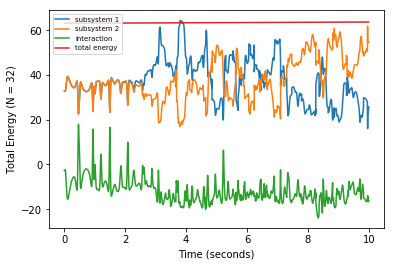

In [95]:
df = pd.DataFrame({'E1': E1_4x4x2[:,1], 'E2': E2_4x4x2[:,1], 'E12': E12_4x4x2[:,1], 'T': E12_4x4x2[:,0]})
df['ET'] = df['E1'] + df['E2']+ df['E12']

df = df.rename_axis('ET').values
print(df[:,4])

plt.plot(E1_4x4x2[:,0], E1_4x4x2[:,1], label="subsystem 1")
plt.plot(E2_4x4x2[:,0], E2_4x4x2[:,1], label="subsystem 2")
plt.plot(E12_4x4x2[:,0], E12_4x4x2[:,1], label="interaction")
plt.plot(E12_4x4x2[:,0], df[:,4], label="total energy")
plt.legend(loc="upper left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy (N = 32)')

[109.56486511 109.56488037 109.56489563 ... 111.26154709 111.26158142
 111.26156616]


Text(0,0.5,'Total Energy (N = 64)')

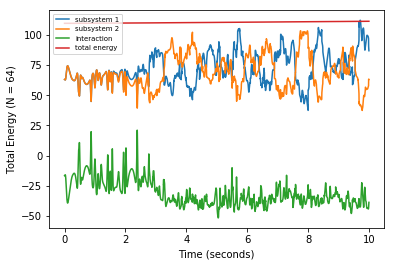

In [96]:
df = pd.DataFrame({'E1': E1_4x4x4[:,1], 'E2': E2_4x4x4[:,1], 'E12': E12_4x4x4[:,1], 'T': E12_4x4x4[:,0]})
df['ET'] = df['E1'] + df['E2']+ df['E12']

df = df.rename_axis('ET').values
print(df[:,4])

plt.plot(E1_4x4x4[:,0], E1_4x4x4[:,1], label="subsystem 1")
plt.plot(E2_4x4x4[:,0], E2_4x4x4[:,1], label="subsystem 2")
plt.plot(E12_4x4x4[:,0], E12_4x4x4[:,1], label="interaction")
plt.plot(E12_4x4x4[:,0], df[:,4], label="total energy")
plt.legend(loc="upper left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy (N = 64)')

[200.0544548  200.05448532 200.05455017 ... 204.3356781  204.33589172
 204.33594513]


Text(0,0.5,'Total Energy (N = 128)')

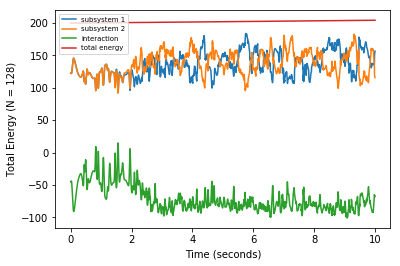

In [98]:
df = pd.DataFrame({'E1': E1_4x8x4[:,1], 'E2': E2_4x8x4[:,1], 'E12': E12_4x8x4[:,1], 'T': E12_4x8x4[:,0]})
df['ET'] = df['E1'] + df['E2']+ df['E12']

df = df.rename_axis('ET').values
print(df[:,4])

plt.plot(E1_4x8x4[:,0], E1_4x8x4[:,1], label="subsystem 1")
plt.plot(E2_4x8x4[:,0], E2_4x8x4[:,1], label="subsystem 2")
plt.plot(E12_4x8x4[:,0], E12_4x8x4[:,1], label="interaction")
plt.plot(E12_4x8x4[:,0], df[:,4], label="total energy")
plt.legend(loc="upper left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy (N = 128)')

[200.05462456 200.05465508 200.05469322 ... 204.29094696 204.29090118
 204.29093552]


Text(0,0.5,'Total Energy (N = 128)')

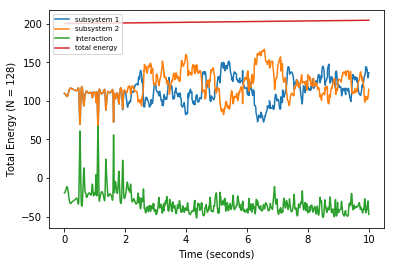

In [100]:
df = pd.DataFrame({'E1': E1_8x4x4[:,1], 'E2': E2_8x4x4[:,1], 'E12': E12_8x4x4[:,1], 'T': E12_8x4x4[:,0]})
df['ET'] = df['E1'] + df['E2']+ df['E12']

df = df.rename_axis('ET').values
print(df[:,4])

plt.plot(E1_8x4x4[:,0], E1_8x4x4[:,1], label="subsystem 1")
plt.plot(E2_8x4x4[:,0], E2_8x4x4[:,1], label="subsystem 2")
plt.plot(E12_8x4x4[:,0], E12_8x4x4[:,1], label="interaction")
plt.plot(E12_8x4x4[:,0], df[:,4], label="total energy")
plt.legend(loc="upper left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy (N = 128)')

[348.65426254 348.65429306 348.65441513 ... 359.16757202 359.16837311
 359.16815186]


Text(0,0.5,'Total Energy (N = 256)')

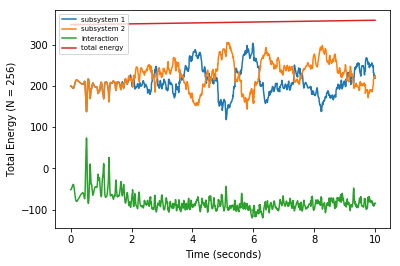

In [101]:
df = pd.DataFrame({'E1': E1_8x8x4[:,1], 'E2': E2_8x8x4[:,1], 'E12': E12_8x8x4[:,1], 'T': E12_8x8x4[:,0]})
df['ET'] = df['E1'] + df['E2']+ df['E12']

df = df.rename_axis('ET').values
print(df[:,4])

plt.plot(E1_8x8x4[:,0], E1_8x8x4[:,1], label="subsystem 1")
plt.plot(E2_8x8x4[:,0], E2_8x8x4[:,1], label="subsystem 2")
plt.plot(E12_8x8x4[:,0], E12_8x8x4[:,1], label="interaction")
plt.plot(E12_8x8x4[:,0], df[:,4], label="total energy")
plt.legend(loc="upper left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy (N = 256)')

[348.66059113 348.66062164 348.66074371 ... 359.17085266 359.17044067
 359.17105103]


Text(0,0.5,'Total Energy (N = 256)')

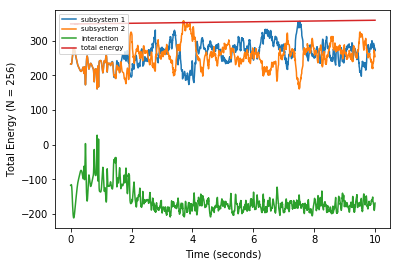

In [102]:
df = pd.DataFrame({'E1': E1_4x8x8[:,1], 'E2': E2_4x8x8[:,1], 'E12': E12_4x8x8[:,1], 'T': E12_4x8x8[:,0]})
df['ET'] = df['E1'] + df['E2']+ df['E12']

df = df.rename_axis('ET').values
print(df[:,4])

plt.plot(E1_4x8x8[:,0], E1_4x8x8[:,1], label="subsystem 1")
plt.plot(E2_4x8x8[:,0], E2_4x8x8[:,1], label="subsystem 2")
plt.plot(E12_4x8x8[:,0], E12_4x8x8[:,1], label="interaction")
plt.plot(E12_4x8x8[:,0], df[:,4], label="total energy")
plt.legend(loc="upper left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy (N = 256)')

Text(0,0.5,'Number of Particles')

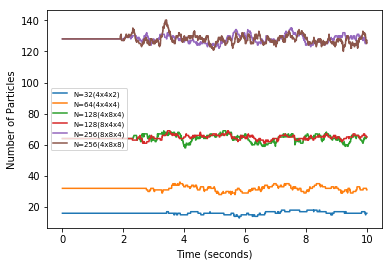

In [110]:
plt.plot(N1_4x4x2[:,0], N1_4x4x2[:,1], label="N=32(4x4x2)")
plt.plot(N1_4x4x4[:,0], N1_4x4x4[:,1], label="N=64(4x4x4)")
plt.plot(N1_4x8x4[:,0], N1_4x8x4[:,1], label="N=128(4x8x4)")
plt.plot(N1_8x4x4[:,0], N1_8x4x4[:,1], label="N=128(8x4x4)")
plt.plot(N1_8x8x4[:,0], N1_8x8x4[:,1], label="N=256(8x8x4)")
plt.plot(N1_4x8x8[:,0], N1_4x8x8[:,1], label="N=256(4x8x8)")

plt.legend(loc="center left", fontsize = 'x-small')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Particles')

** 2). Asuming a thermalization time $T_{th}=5$, use the data for $t>T_{th}$ to calculate the time-average of the quantity A, defined as; **
\begin{align}
\langle A \rangle & = \dfrac{1}{T-T_0}\int_{T_0}^{T}dtA(t)
\end{align}
** and its variance,** 
\begin{align}
\Delta A & = \sqrt{\langle A^2\rangle-\langle A\rangle^2} \\
\langle A^2 \rangle & = \dfrac{1}{T-T_0}\int_{T_0}^TdTA^2(t)
\end{align}

** Notice the above integrals are simply the arithmetic average of all the data for the energy for $t>T_0$ that you consider (and you must choose $T_0\geq T_{th}$). Therefore, all you need to do is sum the data for $A$ or $A^2$ and divide by their number. However, becasue of the large data set, you will need a computer.**

** For $A$ you should use $E_1(t)$, $E_2(t)$, $E_{12}(t)$, and $N_1(t)$. You will need to create a $6\times 8$ size table of the above $4$ quantities and their variances for each of the $6$ box dimensions corresponding to the provided data.**

In [115]:
# Choose thermalization time
T_0 = 5

# Create a subset of the data that goes from T_0 ~= 5 to T ~= 10 for each data set

#N=32
E1_4x4x2_subset = E1_4x4x2[E1_4x4x2[:,0] > T_0]
E2_4x4x2_subset = E2_4x4x2[E2_4x4x2[:,0] > T_0]
E12_4x4x2_subset = E12_4x4x2[E12_4x4x2[:,0] > T_0]
N1_4x4x2_subset = N1_4x4x2[N1_4x4x2[:,0] > T_0]

#N=64
E1_4x4x4_subset = E1_4x4x4[E1_4x4x4[:,0] > T_0]
E2_4x4x4_subset = E2_4x4x4[E2_4x4x4[:,0] > T_0]
E12_4x4x4_subset = E12_4x4x4[E12_4x4x4[:,0] > T_0]
N1_4x4x4_subset = N1_4x4x4[N1_4x4x4[:,0] > T_0]

#N=128
E1_4x8x4_subset = E1_4x8x4[E1_4x8x4[:,0] > T_0]
E2_4x8x4_subset = E2_4x8x4[E2_4x8x4[:,0] > T_0]
E12_4x8x4_subset = E12_4x8x4[E12_4x8x4[:,0] > T_0]
N1_4x8x4_subset = N1_4x8x4[N1_4x8x4[:,0] > T_0]

E1_8x4x4_subset = E1_8x4x4[E1_8x4x4[:,0] > T_0]
E2_8x4x4_subset = E2_8x4x4[E2_8x4x4[:,0] > T_0]
E12_8x4x4_subset = E12_8x4x4[E12_8x4x4[:,0] > T_0]
N1_8x4x4_subset = N1_8x4x4[N1_8x4x4[:,0] > T_0]

#N=256
E1_8x8x4_subset = E1_8x8x4[E1_8x8x4[:,0] > T_0]
E2_8x8x4_subset = E2_8x8x4[E2_8x8x4[:,0] > T_0]
E12_8x8x4_subset = E12_8x8x4[E12_8x8x4[:,0] > T_0]
N1_8x8x4_subset = N1_8x8x4[N1_8x8x4[:,0] > T_0]

E1_4x8x8_subset = E1_4x8x8[E1_4x8x8[:,0] > T_0]
E2_4x8x8_subset = E2_4x8x8[E2_4x8x8[:,0] > T_0]
E12_4x8x8_subset = E12_4x8x8[E12_4x8x8[:,0] > T_0]
N1_4x8x8_subset = N1_4x8x8[N1_4x8x8[:,0] > T_0]


# Integragte the data subset

#N=32
A_E1_4x4x2 = simps(E1_4x4x2_subset[:,1], E1_4x4x2_subset[:,0]) / (E1_4x4x2_subset[-1,0] - E1_4x4x2_subset[0,0])
A_E2_4x4x2 = simps(E2_4x4x2_subset[:,1], E2_4x4x2_subset[:,0]) / (E2_4x4x2_subset[-1,0] - E2_4x4x2_subset[0,0])
A_E12_4x4x2 = simps(E12_4x4x2_subset[:,1], E12_4x4x2_subset[:,0]) / (E12_4x4x2_subset[-1,0] - E12_4x4x2_subset[0,0])
A_N1_4x4x2 = simps(N1_4x4x2_subset[:,1],N1_4x4x2_subset[:,0]) / (N1_4x4x2_subset[-1,0] - N1_4x4x2_subset[0,0])

#N=64
A_E1_4x4x4 = simps(E1_4x4x4_subset[:,1], E1_4x4x4_subset[:,0]) / (E1_4x4x4_subset[-1,0] - E1_4x4x4_subset[0,0])
A_E2_4x4x4 = simps(E2_4x4x4_subset[:,1], E2_4x4x4_subset[:,0]) / (E2_4x4x4_subset[-1,0] - E2_4x4x4_subset[0,0])
A_E12_4x4x4 = simps(E12_4x4x4_subset[:,1], E12_4x4x4_subset[:,0]) / (E12_4x4x4_subset[-1,0] - E12_4x4x4_subset[0,0])
A_N1_4x4x4 = simps(N1_4x4x4_subset[:,1],N1_4x4x4_subset[:,0]) / (N1_4x4x4_subset[-1,0] - N1_4x4x4_subset[0,0])

#N=128
A_E1_4x8x4 = simps(E1_4x8x4_subset[:,1], E1_4x8x4_subset[:,0]) / (E1_4x8x4_subset[-1,0] - E1_4x8x4_subset[0,0])
A_E2_4x8x4 = simps(E2_4x8x4_subset[:,1], E2_4x8x4_subset[:,0]) / (E2_4x8x4_subset[-1,0] - E2_4x8x4_subset[0,0])
A_E12_4x8x4 = simps(E12_4x8x4_subset[:,1], E12_4x8x4_subset[:,0]) / (E12_4x8x4_subset[-1,0] - E12_4x8x4_subset[0,0])
A_N1_4x8x4 = simps(N1_4x8x4_subset[:,1],N1_4x8x4_subset[:,0]) / (N1_4x8x4_subset[-1,0] - N1_4x8x4_subset[0,0])

A_E1_8x4x4 = simps(E1_8x4x4_subset[:,1], E1_8x4x4_subset[:,0]) / (E1_8x4x4_subset[-1,0] - E1_8x4x4_subset[0,0])
A_E2_8x4x4 = simps(E2_8x4x4_subset[:,1], E2_8x4x4_subset[:,0]) / (E2_8x4x4_subset[-1,0] - E2_8x4x4_subset[0,0])
A_E12_8x4x4 = simps(E12_8x4x4_subset[:,1], E12_8x4x4_subset[:,0]) / (E12_8x4x4_subset[-1,0] - E12_8x4x4_subset[0,0])
A_N1_8x4x4 = simps(N1_8x4x4_subset[:,1],N1_8x4x4_subset[:,0]) / (N1_8x4x4_subset[-1,0] - N1_8x4x4_subset[0,0])

#N=256
A_E1_8x8x4 = simps(E1_8x8x4_subset[:,1], E1_8x8x4_subset[:,0]) / (E1_8x8x4_subset[-1,0] - E1_8x8x4_subset[0,0])
A_E2_8x8x4 = simps(E2_8x8x4_subset[:,1], E2_8x8x4_subset[:,0]) / (E2_8x8x4_subset[-1,0] - E2_8x8x4_subset[0,0])
A_E12_8x8x4 = simps(E12_8x8x4_subset[:,1], E12_8x8x4_subset[:,0]) / (E12_8x8x4_subset[-1,0] - E12_8x8x4_subset[0,0])
A_N1_8x8x4 = simps(N1_8x8x4_subset[:,1],N1_8x8x4_subset[:,0]) / (N1_8x8x4_subset[-1,0] - N1_8x8x4_subset[0,0])

A_E1_4x8x8 = simps(E1_4x8x8_subset[:,1], E1_4x8x8_subset[:,0]) / (E1_4x8x8_subset[-1,0] - E1_4x8x8_subset[0,0])
A_E2_4x8x8 = simps(E2_4x8x8_subset[:,1], E2_4x8x8_subset[:,0]) / (E2_4x8x8_subset[-1,0] - E2_4x8x8_subset[0,0])
A_E12_4x8x8 = simps(E12_4x8x8_subset[:,1], E12_4x8x8_subset[:,0]) / (E12_4x8x8_subset[-1,0] - E12_4x8x8_subset[0,0])
A_N1_4x8x8 = simps(N1_4x8x8_subset[:,1],N1_4x8x8_subset[:,0]) / (N1_4x8x8_subset[-1,0] - N1_4x8x8_subset[0,0])


#Print out calculate average quantity

#N=32
print('A_E1_4x4x2  = ', A_E1_4x4x2)
print('A_E2_4x4x2  = ', A_E2_4x4x2)
print('A_E12_4x4x2 = ', A_E12_4x4x2)
print('A_N1_4x4x2 = ', A_N1_4x4x2)

#N=64
print('A_E1_4x4x4  = ', A_E1_4x4x4)
print('A_E2_4x4x4  = ', A_E2_4x4x4)
print('A_E12_4x4x4 = ', A_E12_4x4x4)
print('A_N1_4x4x4 = ', A_N1_4x4x4)

#N=128
print('A_E1_4x8x4  = ', A_E1_4x8x4)
print('A_E2_4x8x4  = ', A_E2_4x8x4)
print('A_E12_4x8x4 = ', A_E12_4x8x4)
print('A_N1_4x8x4 = ', A_N1_4x8x4)

print('A_E1_8x4x4  = ', A_E1_8x4x4)
print('A_E2_8x4x4  = ', A_E2_8x4x4)
print('A_E12_8x4x4 = ', A_E12_8x4x4)
print('A_N1_8x4x4 = ', A_N1_8x4x4)

#N=256
print('A_E1_8x8x4  = ', A_E1_8x8x4)
print('A_E2_8x8x4  = ', A_E2_8x8x4)
print('A_E12_8x8x4 = ', A_E12_8x8x4)
print('A_N1_8x8x4 = ', A_N1_8x8x4)

print('A_E1_4x8x8  = ', A_E1_4x8x8)
print('A_E2_4x8x8  = ', A_E2_4x8x8)
print('A_E12_4x8x8 = ', A_E12_4x8x8)
print('A_N1_4x8x8 = ', A_N1_4x8x8)

A_E1_4x4x2  =  34.82323691987574
A_E2_4x4x2  =  42.291835934028285
A_E12_4x4x2 =  -13.61759871622364
A_N1_4x4x2 =  16.312986625973252
A_E1_4x4x4  =  76.74737429767625
A_E2_4x4x4  =  70.17699805221731
A_E12_4x4x4 =  -36.12662539921447
A_N1_4x4x4 =  31.55284010568021
A_E1_4x8x4  =  143.78645066427097
A_E2_4x8x4  =  140.57601248392902
A_E12_4x8x4 =  -81.16047122476375
A_N1_4x8x4 =  64.02178904357808
A_E1_8x4x4  =  118.37102120065295
A_E2_8x4x4  =  122.43271115423175
A_E12_8x4x4 =  -37.60875449972666
A_N1_8x4x4 =  64.75245950491902
A_E1_8x8x4  =  210.04457189870902
A_E2_8x8x4  =  235.26577100091762
A_E12_8x8x4 =  -88.84026907290898
A_N1_8x8x4 =  128.32939165878332
A_E1_4x8x8  =  273.64676551834896
A_E2_4x8x8  =  258.48225534340673
A_E12_4x8x8 =  -175.6905738489771
A_N1_4x8x8 =  127.32747065494131


The above are the time-averaged quantities and we can use these to calculate the variance of each of these quantities. 

In [149]:
# Calculate <E^2>

#N=32
A2_E1_4x4x2 = simps(E1_4x4x2_subset[:,1]*E1_4x4x2_subset[:,1], E1_4x4x2_subset[:,0]) / (E1_4x4x2_subset[-1,0] - E1_4x4x2_subset[0,0])
A2_E2_4x4x2 = simps(E2_4x4x2_subset[:,1]*E2_4x4x2_subset[:,1], E2_4x4x2_subset[:,0]) / (E2_4x4x2_subset[-1,0] - E2_4x4x2_subset[0,0])
A2_E12_4x4x2 = simps(E12_4x4x2_subset[:,1]*E12_4x4x2_subset[:,1], E12_4x4x2_subset[:,0]) / (E12_4x4x2_subset[-1,0] - E12_4x4x2_subset[0,0])
A2_N1_4x4x2 = simps(N1_4x4x2_subset[:,1]*N1_4x4x2_subset[:,1],N1_4x4x2_subset[:,0]) / (N1_4x4x2_subset[-1,0] - N1_4x4x2_subset[0,0])

#N=64
A2_E1_4x4x4 = simps(E1_4x4x4_subset[:,1]*E1_4x4x4_subset[:,1], E1_4x4x4_subset[:,0]) / (E1_4x4x4_subset[-1,0] - E1_4x4x4_subset[0,0])
A2_E2_4x4x4 = simps(E2_4x4x4_subset[:,1]*E2_4x4x4_subset[:,1], E2_4x4x4_subset[:,0]) / (E2_4x4x4_subset[-1,0] - E2_4x4x4_subset[0,0])
A2_E12_4x4x4 = simps(E12_4x4x4_subset[:,1]*E12_4x4x4_subset[:,1], E12_4x4x4_subset[:,0]) / (E12_4x4x4_subset[-1,0] - E12_4x4x4_subset[0,0])
A2_N1_4x4x4 = simps(N1_4x4x4_subset[:,1]*N1_4x4x4_subset[:,1],N1_4x4x4_subset[:,0]) / (N1_4x4x4_subset[-1,0] - N1_4x4x4_subset[0,0])

#N=128
A2_E1_4x8x4 = simps(E1_4x8x4_subset[:,1]*E1_4x8x4_subset[:,1], E1_4x8x4_subset[:,0]) / (E1_4x8x4_subset[-1,0] - E1_4x8x4_subset[0,0])
A2_E2_4x8x4 = simps(E2_4x8x4_subset[:,1]*E2_4x8x4_subset[:,1], E2_4x8x4_subset[:,0]) / (E2_4x8x4_subset[-1,0] - E2_4x8x4_subset[0,0])
A2_E12_4x8x4 = simps(E12_4x8x4_subset[:,1]*E12_4x8x4_subset[:,1], E12_4x8x4_subset[:,0]) / (E12_4x8x4_subset[-1,0] - E12_4x8x4_subset[0,0])
A2_N1_4x8x4 = simps(N1_4x8x4_subset[:,1]*N1_4x8x4_subset[:,1],N1_4x8x4_subset[:,0]) / (N1_4x8x4_subset[-1,0] - N1_4x8x4_subset[0,0])

A2_E1_8x4x4 = simps(E1_8x4x4_subset[:,1]*E1_8x4x4_subset[:,1], E1_8x4x4_subset[:,0]) / (E1_8x4x4_subset[-1,0] - E1_8x4x4_subset[0,0])
A2_E2_8x4x4 = simps(E2_8x4x4_subset[:,1]*E2_8x4x4_subset[:,1], E2_8x4x4_subset[:,0]) / (E2_8x4x4_subset[-1,0] - E2_8x4x4_subset[0,0])
A2_E12_8x4x4 = simps(E12_8x4x4_subset[:,1]*E12_8x4x4_subset[:,1], E12_8x4x4_subset[:,0]) / (E12_8x4x4_subset[-1,0] - E12_8x4x4_subset[0,0])
A2_N1_8x4x4 = simps(N1_8x4x4_subset[:,1]*N1_8x4x4_subset[:,1],N1_8x4x4_subset[:,0]) / (N1_8x4x4_subset[-1,0] - N1_8x4x4_subset[0,0])

#N=256
A2_E1_8x8x4 = simps(E1_8x8x4_subset[:,1]*E1_8x8x4_subset[:,1], E1_8x8x4_subset[:,0]) / (E1_8x8x4_subset[-1,0] - E1_8x8x4_subset[0,0])
A2_E2_8x8x4 = simps(E2_8x8x4_subset[:,1]*E2_8x8x4_subset[:,1], E2_8x8x4_subset[:,0]) / (E2_8x8x4_subset[-1,0] - E2_8x8x4_subset[0,0])
A2_E12_8x8x4 = simps(E12_8x8x4_subset[:,1]*E12_8x8x4_subset[:,1], E12_8x8x4_subset[:,0]) / (E12_8x8x4_subset[-1,0] - E12_8x8x4_subset[0,0])
A2_N1_8x8x4 = simps(N1_8x8x4_subset[:,1]*N1_8x8x4_subset[:,1],N1_8x8x4_subset[:,0]) / (N1_8x8x4_subset[-1,0] - N1_8x8x4_subset[0,0])

A2_E1_4x8x8 = simps(E1_4x8x8_subset[:,1]*E1_4x8x8_subset[:,1], E1_4x8x8_subset[:,0]) / (E1_4x8x8_subset[-1,0] - E1_4x8x8_subset[0,0])
A2_E2_4x8x8 = simps(E2_4x8x8_subset[:,1]*E2_4x8x8_subset[:,1], E2_4x8x8_subset[:,0]) / (E2_4x8x8_subset[-1,0] - E2_4x8x8_subset[0,0])
A2_E12_4x8x8 = simps(E12_4x8x8_subset[:,1]*E12_4x8x8_subset[:,1], E12_4x8x8_subset[:,0]) / (E12_4x8x8_subset[-1,0] - E12_4x8x8_subset[0,0])
A2_N1_4x8x8 = simps(N1_4x8x8_subset[:,1]*N1_4x8x8_subset[:,1],N1_4x8x8_subset[:,0]) / (N1_4x8x8_subset[-1,0] - N1_4x8x8_subset[0,0])


#Calculate standard deviation

#N=32
DA2_E1_4x4x2  = sqrt(A2_E1_4x4x2 - A_E1_4x4x2*A_E1_4x4x2)
DA2_E2_4x4x2  = sqrt(A2_E2_4x4x2 - A_E2_4x4x2*A_E2_4x4x2)
DA2_E12_4x4x2 = sqrt(A2_E12_4x4x2 - A_E12_4x4x2*A_E12_4x4x2)
DA2_N1_4x4x2 = sqrt(A2_N1_4x4x2 - A_N1_4x4x2*A_N1_4x4x2)

#N=64
DA2_E1_4x4x4  = sqrt(A2_E1_4x4x4 - A_E1_4x4x4*A_E1_4x4x4)
DA2_E2_4x4x4  = sqrt(A2_E2_4x4x4 - A_E2_4x4x4*A_E2_4x4x4)
DA2_E12_4x4x4 = sqrt(A2_E12_4x4x4 - A_E12_4x4x4*A_E12_4x4x4)
DA2_N1_4x4x4 = sqrt(A2_N1_4x4x4 - A_N1_4x4x4*A_N1_4x4x4)

#N=128
DA2_E1_4x8x4  = sqrt(A2_E1_4x8x4 - A_E1_4x8x4*A_E1_4x8x4)
DA2_E2_4x8x4  = sqrt(A2_E2_4x8x4 - A_E2_4x8x4*A_E2_4x8x4)
DA2_E12_4x8x4 = sqrt(A2_E12_4x8x4 - A_E12_4x8x4*A_E12_4x8x4)
DA2_N1_4x8x4 = sqrt(A2_N1_4x8x4 - A_N1_4x8x4*A_N1_4x8x4)

DA2_E1_8x4x4  = sqrt(A2_E1_8x4x4 - A_E1_8x4x4*A_E1_8x4x4)
DA2_E2_8x4x4  = sqrt(A2_E2_8x4x4 - A_E2_8x4x4*A_E2_8x4x4)
DA2_E12_8x4x4 = sqrt(A2_E12_8x4x4 - A_E12_8x4x4*A_E12_8x4x4)
DA2_N1_8x4x4 = sqrt(A2_N1_8x4x4 - A_N1_8x4x4*A_N1_8x4x4)

#N=256
DA2_E1_8x8x4  = sqrt(A2_E1_8x8x4 - A_E1_8x8x4*A_E1_8x8x4)
DA2_E2_8x8x4  = sqrt(A2_E2_8x8x4 - A_E2_8x8x4*A_E2_8x8x4)
DA2_E12_8x8x4 = sqrt(A2_E12_8x8x4 - A_E12_8x8x4*A_E12_8x8x4)
DA2_N1_8x8x4 = sqrt(A2_N1_8x8x4 - A_N1_8x8x4*A_N1_8x8x4)

DA2_E1_4x8x8  = sqrt(A2_E1_4x8x8 - A_E1_4x8x8*A_E1_4x8x8)
DA2_E2_4x8x8  = sqrt(A2_E2_4x8x8 - A_E2_4x8x8*A_E2_4x8x8)
DA2_E12_4x8x8 = sqrt(A2_E12_4x8x8 - A_E12_4x8x8*A_E12_4x8x8)
DA2_N1_4x8x8 = sqrt(A2_N1_4x8x8 - A_N1_4x8x8*A_N1_4x8x8)

#N=32
print("Delta E1(N = 32)  = ", DA2_E1_4x4x2)
print("Delta E2(N = 32)  = ", DA2_E2_4x4x2)
print("Delta E12(N = 32) = ", DA2_E12_4x4x2)
print("Delta N1(N = 32) = ", DA2_N1_4x4x2)

#N=64
print("Delta E1(N = 64)  = ", DA2_E1_4x4x4)
print("Delta E2(N = 64)  = ", DA2_E2_4x4x4)
print("Delta E12(N = 64) = ", DA2_E12_4x4x4)
print("Delta N1(N = 64) = ", DA2_N1_4x4x4)

#N=128
print("Delta E1(N = 128)  = ", DA2_E1_4x8x4)
print("Delta E2(N = 128)  = ", DA2_E2_4x8x4)
print("Delta E12(N = 128) = ", DA2_E12_4x8x4)
print("Delta N1(N = 128) = ", DA2_N1_4x8x4)

print("Delta E'1(N = 128)  = ", DA2_E1_8x4x4)
print("Delta E'2(N = 128)  = ", DA2_E2_8x4x4)
print("Delta E'12(N = 128) = ", DA2_E12_8x4x4)
print("Delta N'1(N = 128) = ", DA2_N1_8x4x4)

#N=256
print("Delta E1(N = 256)  = ", DA2_E1_8x8x4)
print("Delta E2(N = 256)  = ", DA2_E2_8x8x4)
print("Delta E12(N = 256) = ", DA2_E12_8x8x4)
print("Delta N1(N = 256) = ", DA2_N1_8x8x4)

print("Delta E'1(N = 256)  = ", DA2_E1_4x8x8)
print("Delta E'2(N = 256)  = ", DA2_E2_4x8x8)
print("Delta E'12(N = 256) = ", DA2_E12_4x8x8)
print("Delta N'1(N = 256) = ", DA2_N1_4x8x8)

Delta E1(N = 32)  =  9.518803728854737
Delta E2(N = 32)  =  9.57796452543378
Delta E12(N = 32) =  3.388205008423522
Delta N1(N = 32) =  1.1387783636491755
Delta E1(N = 64)  =  14.768154878949941
Delta E2(N = 64)  =  14.876875314588084
Delta E12(N = 64) =  5.672776744137002
Delta N1(N = 64) =  1.8219105542072493
Delta E1(N = 128)  =  17.698394373057802
Delta E2(N = 128)  =  17.92878221986368
Delta E12(N = 128) =  9.25054784440391
Delta N1(N = 128) =  2.4018034423845367
Delta E'1(N = 128)  =  17.68809161313994
Delta E'2(N = 128)  =  18.13558535154017
Delta E'12(N = 128) =  6.371326372446746
Delta N'1(N = 128) =  1.4013214310965423
Delta E1(N = 256)  =  36.514765977414164
Delta E2(N = 256)  =  34.920392130824546
Delta E12(N = 256) =  11.067796974715952
Delta N1(N = 256) =  2.626633615586658
Delta E'1(N = 256)  =  28.011714448119267
Delta E'2(N = 256)  =  28.43020955848269
Delta E'12(N = 256) =  13.652037882926766
Delta N'1(N = 256) =  2.4250346278374937


Now we can insert all these values into a $6\times 8$ table.

In [140]:
df_6x8 = pd.DataFrame({'4x4x2' : [34.82323691987574, 9.518803728854737, 42.291835934028285, 9.57796452543378,-13.61759871622364, 3.388205008423522, 16.312986625973252, 1.1387783636491755],
                       '4x4x4' : [76.74737429767625, 14.768154878949941, 70.17699805221731, 14.876875314588084, -36.12662539921447, 5.672776744137002, 31.55284010568021, 5.672776744137002],
                       '4x8x4' : [143.78645066427097, 17.698394373057802, 140.57601248392902, 17.92878221986368, -81.16047122476375,  9.25054784440391, 64.75245950491902, 2.4018034423845367], 
                       '8x4x4' : [118.37102120065295, 17.68809161313994, 122.43271115423175, 18.13558535154017, -37.60875449972666, 6.371326372446746,  64.75245950491902, 1.4013214310965423],
                       '8x8x4' : [210.04457189870902, 36.514765977414164, 235.26577100091762, 34.920392130824546, -88.84026907290898, 11.067796974715952, 128.32939165878332, 2.626633615586658],
                       '4x8x8' : [273.64676551834896, 28.011714448119267, 258.48225534340673, 28.43020955848269, -175.6905738489771, 13.652037882926766, 127.32747065494131, 2.4250346278374937]})
print(df_6x8)

       4x4x2      4x4x4       4x8x4       4x8x8       8x4x4       8x8x4
0  34.823237  76.747374  143.786451  273.646766  118.371021  210.044572
1   9.518804  14.768155   17.698394   28.011714   17.688092   36.514766
2  42.291836  70.176998  140.576012  258.482255  122.432711  235.265771
3   9.577965  14.876875   17.928782   28.430210   18.135585   34.920392
4 -13.617599 -36.126625  -81.160471 -175.690574  -37.608754  -88.840269
5   3.388205   5.672777    9.250548   13.652038    6.371326   11.067797
6  16.312987  31.552840   64.752460  127.327471   64.752460  128.329392
7   1.138778   5.672777    2.401803    2.425035    1.401321    2.626634


** 3). Notice that the average $N_1$ is approximately $N/2$**

\begin{align}
N=32  & \longrightarrow N_1\approx 16.31 \\
N=64  & \longrightarrow N_1\approx 31.55 \\
N=128  & \longrightarrow N_1\approx 64.02 \\
N=256  & \longrightarrow N_1\approx 128.32
\end{align} 

**4). Show that the average energy of the subsystem I approximately scales linearly with $N_1$ , the average number of particles contained in the sub- system I, using the results of your calculation for the four different values of $N$ you used above. Now plot the total energy of the subsys- tem I per particle, i.e., $E_1(t_n)/N_1$ on the same graph as a function of time for all 4 systems sizes considered. This should show that the val- ues of the energy per particle are not too different for different values of $N$ . What happens to the relative energy fluctuations when you plot your results of the energy per particle?**

Text(0,0.5,'Average Energy Subsystem 1')

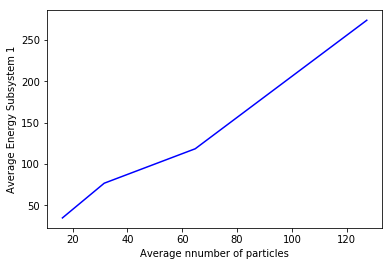

In [130]:
KEs = [A_E1_4x4x2, A_E1_4x4x4, A_E1_8x4x4, A_E1_4x8x8] # average kinetic energy
Ns  = [A_N1_4x4x2, A_N1_4x4x4, A_N1_8x4x4, A_N1_4x8x8]

plt.plot(Ns, KEs, "b-")
plt.xlabel('Average nnumber of particles')
plt.ylabel('Average Energy Subsystem 1')

Text(0,0.5,'Total energy of subsystem 1 per particle')

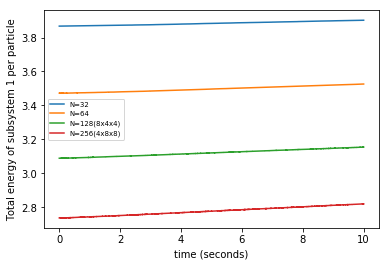

In [136]:
# Plot average kinetic energy per particle

#N=32
df_32 = pd.DataFrame({'E1': E1_4x4x2[:,1], 'E2': E2_4x4x2[:,1], 'E12': E12_4x4x2[:,1], 'T': E12_4x4x2[:,0]})
df_32['ET'] = df_32['E1'] + df_32['E2']+ df_32['E12']
df_32 = df_32.rename_axis('ET').values

#N=64
df_64 = pd.DataFrame({'E1': E1_4x4x4[:,1], 'E2': E2_4x4x4[:,1], 'E12': E12_4x4x4[:,1], 'T': E12_4x4x4[:,0]})
df_64['ET'] = df_64['E1'] + df_64['E2']+ df_64['E12']
df_64 = df_64.rename_axis('ET').values

#N=128
df_128 = pd.DataFrame({'E1': E1_8x4x4[:,1], 'E2': E2_8x4x4[:,1], 'E12': E12_8x4x4[:,1], 'T': E12_8x4x4[:,0]})
df_128['ET'] = df_128['E1'] + df_128['E2']+ df_128['E12']
df_128 = df_128.rename_axis('ET').values

#N=256
df_256 = pd.DataFrame({'E1': E1_4x8x8[:,1], 'E2': E2_4x8x8[:,1], 'E12': E12_4x8x8[:,1], 'T': E12_4x8x8[:,0]})
df_256['ET'] = df_256['E1'] + df_256['E2']+ df_256['E12']
df_256 = df_256.rename_axis('ET').values


plt.plot(E1_4x4x2[:,0], df_32[:,4] / A_N1_4x4x2, label="N=32")
plt.plot(E1_4x4x4[:,0], df_64[:,4] / A_N1_4x4x4, label="N=64")
plt.plot(E1_8x4x4[:,0], df_128[:,4] / A_N1_8x4x4, label="N=128(8x4x4)")
plt.plot(E1_4x8x8[:,0], df_256[:,4] / A_N1_4x8x8, label="N=256(4x8x8)")

plt.legend(loc="center left", fontsize = 'x-small')

plt.xlabel('time (seconds)')
plt.ylabel('Total energy of subsystem 1 per particle')

In subsysem 1, the average energy increases with the number of particles but the total energy per particle decreases with number of particles. 

** 5). Show that the average variance of $E_1$ scales approximately with $\sqrt N_1$, the average number of particles contained in subsystem 1, using the results of your calculation for the four different values of N you used above. Note that this scaling is valid asymptotically true, namely for very large values of N. Based on this what conclusion can you draw about the relative fluctuations of the subsystem 1 energy for large N? Namely, how does $\dfrac{\Delta E_1}{\langle E_1 \rangle}$ scale?**

Text(0,0.5,'$\\Delta E_1$')

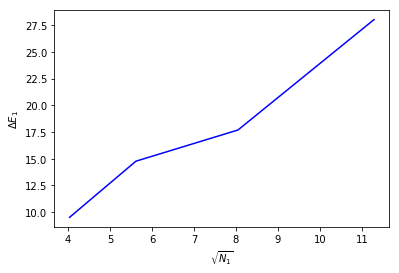

In [138]:
#Array of standard deviation for each E and sqrt(N)
DEs = [DA2_E1_4x4x2, DA2_E1_4x4x4, DA2_E1_8x4x4, DA2_E1_4x8x8]
SNs = [sqrt(A_N1_4x4x2), sqrt(A_N1_4x4x4), sqrt(A_N1_8x4x4), sqrt(A_N1_4x8x8)]

plt.plot(SNs, DEs, "b-")
plt.xlabel('$\sqrt{N_1}$')
plt.ylabel('$\Delta E_1$')

Text(0,0.5,'$\\Delta$E/<E>')

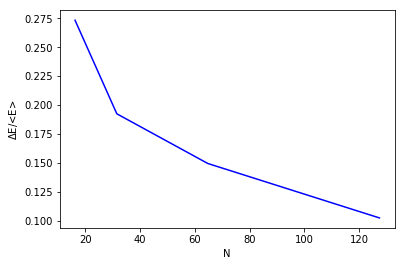

In [139]:
# Fluctuation measure
fluctuation_measure = [DA2_E1_4x4x2/A_E1_4x4x2 , DA2_E1_4x4x4/A_E1_4x4x4 , DA2_E1_8x4x4/A_E1_8x4x4 , DA2_E1_4x8x8/A_E1_4x8x8]


plt.plot(Ns, fluctuation_measure, "b-")
plt.xlabel("N")
plt.ylabel("$\Delta$E/<E>")

From above we see that $\dfrac{\Delta E_1}{\langle E_1 \rangle}$ decreases with large N. This serves as a measure of the fluctuations because although the variance $\Delta E_1$ increases with large N, we are concerned with the relative fluctuations between different values of N. 

** 6). By examining the results of your table, does the interaction energy $E_{12}$ between the two subsystems 1 scale as you expect for the various box dimensions? Take into account that the interface between the two subsystems is perpendicular to the x dimension of the box. Therefore, based on that what do you expect to happen when you increase $L_x$ , or $L_y$ or $L_z$ ? Is that followed approximately by your data? What could be the main reason why this is only approximately correct?**

In [148]:
df_6x8 = pd.DataFrame({'A'     : ['E1', 'D_E1', 'E2', 'D_E2', 'E12', 'D_E12', 'N1', 'D_N1'],
                       '4x4x2' : [34.82323691987574, 9.518803728854737, 42.291835934028285, 9.57796452543378,-13.61759871622364, 3.388205008423522, 16.312986625973252, 1.1387783636491755],
                       '4x4x4' : [76.74737429767625, 14.768154878949941, 70.17699805221731, 14.876875314588084, -36.12662539921447, 5.672776744137002, 31.55284010568021, 5.672776744137002],
                       '4x8x4' : [143.78645066427097, 17.698394373057802, 140.57601248392902, 17.92878221986368, -81.16047122476375,  9.25054784440391, 64.75245950491902, 2.4018034423845367], 
                       '8x4x4' : [118.37102120065295, 17.68809161313994, 122.43271115423175, 18.13558535154017, -37.60875449972666, 6.371326372446746,  64.75245950491902, 1.4013214310965423],
                       '8x8x4' : [210.04457189870902, 36.514765977414164, 235.26577100091762, 34.920392130824546, -88.84026907290898, 11.067796974715952, 128.32939165878332, 2.626633615586658],
                       '4x8x8' : [273.64676551834896, 28.011714448119267, 258.48225534340673, 28.43020955848269, -175.6905738489771, 13.652037882926766, 127.32747065494131, 2.4250346278374937]})
print(df_6x8)

       4x4x2      4x4x4       4x8x4       4x8x8       8x4x4       8x8x4      A
0  34.823237  76.747374  143.786451  273.646766  118.371021  210.044572     E1
1   9.518804  14.768155   17.698394   28.011714   17.688092   36.514766   D_E1
2  42.291836  70.176998  140.576012  258.482255  122.432711  235.265771     E2
3   9.577965  14.876875   17.928782   28.430210   18.135585   34.920392   D_E2
4 -13.617599 -36.126625  -81.160471 -175.690574  -37.608754  -88.840269    E12
5   3.388205   5.672777    9.250548   13.652038    6.371326   11.067797  D_E12
6  16.312987  31.552840   64.752460  127.327471   64.752460  128.329392     N1
7   1.138778   5.672777    2.401803    2.425035    1.401321    2.626634   D_N1


Due to the fact that the interface of interaction is perpendicular to the x-dimension, i.e. lies in the y-z plane, we expect the interaction energy to increase when the surface area of interaction is increased in the y-z plane. Length changes in the x-dimension do not significantly increase the the surface area of interaction between the two subsysems, they only increase the total volume of subsystem 1 or 2. 

This is only approximately correct because although changes in the x-direction do not directly increase the surface area of interaction between the two subsystems, changes in volume can increase or decrease the frequency of interaction between the two subsystems. 

For example, increasing the volume by doubling the length in the x-dimension will decrease the frequency of interaction between the two subsystems. If we consider the box contains only a single particle, the particle will have twice the space to explore as it bounces around the box before it crosses the interface again. Similarly, halving the length in the x-dimension will increase the frequency of interaction because the particle spends less time bouncing around the space in subsystem 1 before it crosses over to subsystem 2. 

** 7). Now, without actually calculating it, explain what you expect the histogram of the distribution of the values $E_1(t_n)$ of the total energy of subsystem I to look like for various values of $N$ . Repeat this step for the histogram of $N_1(t_n)$.**

We expect it to look like a Gaussian distribution about the mean energy. The width of the distribution increases with the system size. The width of the distribtion represents the measure of the fluctuations relative to the mean, i.e., the variance of the total energy.